In [1]:
import pandas as pd 

In [39]:
inputfile = 'data/3_clean_zomato_feat_ori_train.csv'
outputfile = 'data/3_clean_zomato_feat_ori_sampling_train.csv'

In [40]:
df = pd.read_csv(inputfile)
df = df[df['rating']>0]

In [41]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,alcohol,delivery,entertainment,...,mid_east,noodle,others_type,seafood,snacks,special_food,street_food,tea,western,rating
0,5122,https://www.zomato.com/jakarta/may-star-penjar...,300000,144.0,-6.127206,106.791299,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9
1,3004,https://www.zomato.com/jakarta/shigeru-pantai-...,100000,187.0,-6.109828,106.740279,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9
2,3838,https://www.zomato.com/jakarta/ruths-chris-ste...,1900000,569.0,-6.224840,106.824214,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.6
3,3216,https://www.zomato.com/jakarta/holycow-steak-h...,400000,259.0,-6.244192,106.783964,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,1509,https://www.zomato.com/jakarta/txoko-senopati/...,500000,172.0,-6.233866,106.812572,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.5


<AxesSubplot:ylabel='Frequency'>

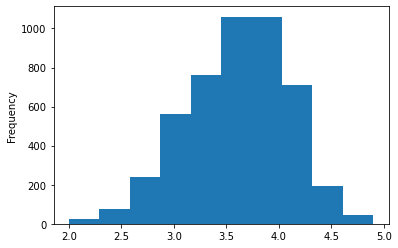

In [42]:
df['rating'].plot(kind='hist')

In [43]:
df_lower_1 = df[df['rating']<2.7]
df_lower_2 = df[(df['rating'] >= 2.7) & (df['rating'] < 3.3) ]
df_midd = df[ (df['rating'] >= 3.3) & (df['rating'] < 4.0) ] 
df_upp1 = df[ (df['rating'] >= 4.0) & (df['rating'] < 4.5) ] 
df_upp2 = df[ df['rating'] >= 4.5] 

In [44]:
df_lower_1.shape , df_lower_2.shape,  df_midd.shape, df_upp1.shape, df_upp2.shape 

((152, 47), (970, 47), (2319, 47), (1143, 47), (146, 47))

In [45]:
def sampling (df_input, sampling_row, iteration):
    result = []
    for i in range(iteration):
          result.append(df_input.sample(sampling_row))
    df_result = pd.concat(result)
    return df_result 

In [46]:
# lower 1 
df_lower1 = sampling(df_lower_1, 2, 900)

# lower 2
df_lower2 = sampling(df_lower_2, 2, 800)

# upper 1 
df_upper1 = sampling(df_upp1, 2, 700)

# upper 2 
df_upper2 = sampling(df_upp2, 2, 700)

In [47]:
df_result = pd.concat([df_lower1,df_lower2,df_midd,df_upper1,df_upper2])

In [48]:
df_result.shape

(8519, 47)

<AxesSubplot:ylabel='Frequency'>

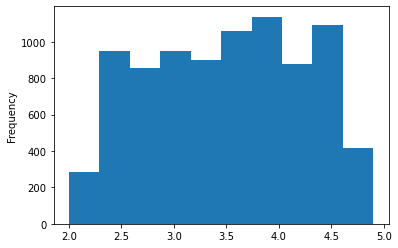

In [49]:
df_result['rating'].plot(kind='hist')

In [50]:
df_result.to_csv(outputfile, index=False)